In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [10]:
n_samples = 500 # 샘플 데이터 개수
centers = 4 # 클러스터 개수
cluster_std = 0.75 # 클러스터 내 표준편차
random_state = 13 # 샘플 데이터 고정

data, clusters = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)

In [11]:
# 데이터 타원형으로 만들기
tf = [[0.6, -0.6], [-0.4, 0.8]]
data_tf = data @ tf # @: 행렬의 곱을 나타냄
df = pd.DataFrame(data_tf)

<Axes: xlabel='0', ylabel='1'>

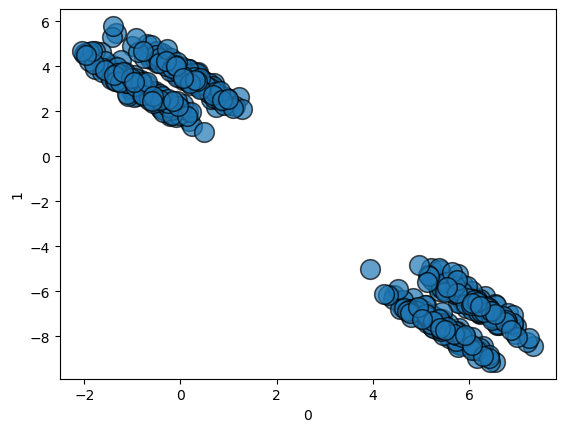

In [12]:
# 시각화
sns.scatterplot(x=df[0], y=df[1], alpha = 0.7, edgecolor="k", s=200)

In [13]:
# k-means 학습
model = KMeans(n_clusters=4, random_state=123)
model.fit(df)
df['kmeans_label'] = model.predict(df)
centers = model.cluster_centers_ # 각 클러스터의 Centroid

/Users/crema/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='0', ylabel='1'>

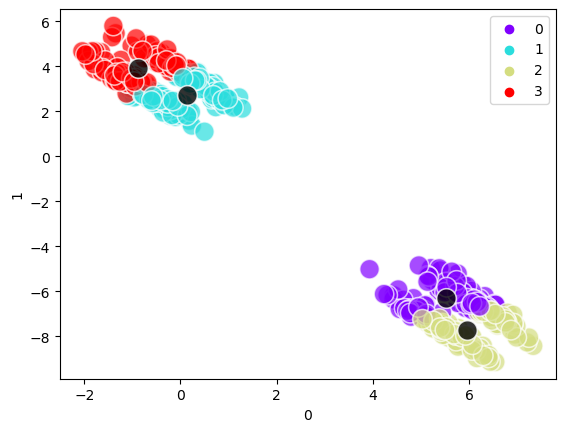

In [14]:
# 시각화
sns.scatterplot(x=df[0], y=df[1], hue=df['kmeans_label'], palette='rainbow', alpha=0.7, s=200)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', alpha=0.8, s=200)

In [15]:
df = df.drop(columns=['kmeans_label'], axis=1)

In [16]:
from sklearn.mixture import GaussianMixture

<Axes: xlabel='0', ylabel='1'>

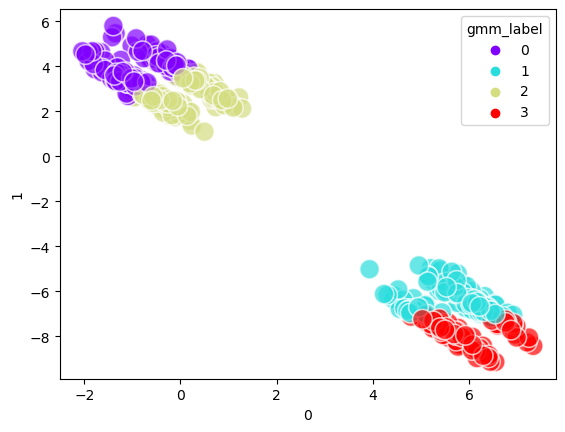

In [19]:
n_components = 4 #분포 개수
random_state =10 #모델 고정

model = GaussianMixture(n_components=n_components, random_state=random_state)

# GMM 모델 학습
model.fit(df)
df['gmm_label'] = model.predict(df)

# 시각화
sns.scatterplot(x=df[0], y=df[1], hue=df['gmm_label'], palette='rainbow', alpha=0.7, s=200)